# Figures of Transformer Components

In [96]:
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
from pylab import *
import seaborn as sns
from matplotlib import rc
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sns.set_style('ticks')
import matplotlib.font_manager
for font in matplotlib.font_manager.findSystemFonts(
    '/Users/deepak/Library/Fonts/'):
    matplotlib.font_manager.fontManager.addfont(font)
font = {
    #'font.family':'Roboto',
    'font.weight': 1000,
    'font.size': 12,
}
sns.set_style(font)
paper_rc = {
    'lines.linewidth': 3,
    'lines.markersize': 10,
}
sns.set_context("paper", font_scale=3,  rc=paper_rc)
current_palette = sns.color_palette()

## Reads data into list of dicts
call `pd.dataframe(read_logfile(*))` to get a dataframe easily.


In [97]:
def read_logfile(logfile_name):
    all_values = []
    value_labels = ['num_attention_heads', 'hidden_size', 'train_micro_batch_size_per_gpu',
                    'tensor_mp_size', 'pipeline_mp_size', 'dp_size',]
    with open(logfile_name, 'r') as f:
        reading_estimate = False
        for line in f:
            line = line.strip()
            if line == "Estimate":
                reading_estimate = True
            elif line == "Actual":
                reading_estimate = False
            match = re.match(r'num_attention_heads: (\d+), hidden_size: (\d+), '
                             r'train_micro_batch_size_per_gpu: (\d+), tensor_mp_size: (\d+), '
                             r'pipeline_mp_size: (\d+), dp_size: (\d+)', line)
            if match is not None:
                values = {}
                for i in range(1, 7):
                    values[value_labels[i-1]] = int(match.group(i))
                all_values.append(values)

            match = re.match(r'num_attention_heads: (\d+), hidden_size: (\d+), '
                             r'microbatch_size: (\d+), tensor_mp_size: (\d+), '
                             r'pipeline_mp_size: (\d+), dp_size: (\d+)', line)
                             
            if match is not None:
                values = {}
                for i in range(1, 7):
                    values[value_labels[i-1]] = int(match.group(i))
                all_values.append(values)

            match = re.match(r'Throughput \(in TFLOP/s\) for attention_key_value_query_transform \((.*)\): (\d+\.\d+)', line)
            if match is not None:
                throughput = float(match.group(2))
                if reading_estimate:
                    all_values[-1]["attention_key_value_query_transform"] = throughput
            
            match = re.match(r'Throughput \(in TFLOP/s\) for attention_key_query_prob \((.*)\): (\d+\.\d+)', line)
            if match is not None:
                throughput = float(match.group(2))
                if reading_estimate:
                    all_values[-1]["attention_key_query_prob"] = throughput

            match = re.match(r'Throughput \(in TFLOP/s\) for attention_prob_times_values \((.*)\): (\d+\.\d+)', line)
            if match is not None:
                throughput = float(match.group(2))
                if reading_estimate:
                    all_values[-1]["attention_prob_times_values"] = throughput
            
            match = re.match(r'Throughput \(in TFLOP/s\) for attention_linear_projection \((.*)\): (\d+\.\d+)', line)
            if match is not None:
                throughput = float(match.group(2))
                if reading_estimate:
                    all_values[-1]["attention_linear_projection"] = throughput 

            match = re.match(r'Throughput \(in TFLOP/s\) for mlp_h_to_4h \((.*)\): (\d+\.\d+)', line)
            if match is not None:
                throughput = float(match.group(2))
                if reading_estimate:
                    all_values[-1]["mlp_h_to_4h"] = throughput  

            match = re.match(r'Throughput \(in TFLOP/s\) for mlp_4h_to_h \((.*)\): (\d+\.\d+)', line)
            if match is not None:
                throughput = float(match.group(2))
                if reading_estimate:
                    all_values[-1]["mlp_4h_to_h"] = throughput 
                
            match = re.match(r'Attention throughput \(in TFLOP/s\): (\d+\.\d+)', line)
            if match is not None:
                throughput = float(match.group(1))
                if reading_estimate:
                    all_values[-1]["estimated_attention_throughput"] = throughput
                else:
                   all_values[-1]["actual_attention_throughput"] = throughput 

            match = re.match(r'Transformer duration \(in seconds\): (\d+\.\d+)', line)
            if match is not None:
                duration = float(match.group(1))
                if reading_estimate:
                    all_values[-1]["estimated_duration"] = duration
                else:
                    all_values[-1]["actual_duration"] = duration
            match = re.match(r'Transformer throughput \(in TFLOP/s\): (\d+\.\d+)', line)
            if match is not None:
                throughput = float(match.group(1))
                if reading_estimate:
                    all_values[-1]["estimated_throughput"] = throughput
                else:
                    all_values[-1]["actual_throughput"] = throughput
    return all_values


In [98]:
def read_repeats(logfile_name):
    throughputs = []
    value_labels = ['num_attention_heads', 'hidden_size', 'train_micro_batch_size_per_gpu',
                    'tensor_mp_size', 'pipeline_mp_size', 'dp_size',]
    with open(logfile_name, 'r') as f:
        reading_estimate = False
        for line in f:
            line = line.strip()
            if line == "Estimate":
                reading_estimate = True
            elif line == "Actual":
                reading_estimate = False
            match = re.match(r'num_attention_heads: (\d+), hidden_size: (\d+), '
                             r'train_micro_batch_size_per_gpu: (\d+), tensor_mp_size: (\d+), '
                             r'pipeline_mp_size: (\d+), dp_size: (\d+)', line)
            if match is not None:
                values = {}
                for i in range(1, 7):
                    values[value_labels[i-1]] = int(match.group(i))

            
            match = re.match(r'Throughput \(in TFLOP/s\) for attention_linear_projection \((.*)\): (\d+\.\d+)', line)
            if match is not None:
                throughput = float(match.group(2))
                if reading_estimate:
                    throughputs.append(throughput)

            
    return throughputs

In [99]:
label_mapping = {'tensor_mp_size': 'TMP'}

def is_in_group(durations, group):
    match = True
    for group_key in group:
        if durations[group_key] != group[group_key]:
            match = False
    return match


In [100]:
def plot_actual_layer_throughput(all_values, title, point_plot=None, tp = None, output_filename=None):
    ylabel="Throughput \n (TFLOP/s)"
    tps = [{'tensor_mp_size':1},{'tensor_mp_size':2},{'tensor_mp_size':4},{'tensor_mp_size':8}]

    plt.figure(figsize=(12,5),dpi=500)
    ax=plt.subplot2grid((1,1),(0,0),colspan=1)
    colors = ['r','b']
    for i in range(len(tps)):
        x_and_y_values = [(values['hidden_size'],
                           values["actual_throughput"])
                          for values in all_values 
                          if is_in_group(values, tps[i]) 
        ]
        ax.plot([x for (x, _) in x_and_y_values],
                [y for (_, y) in x_and_y_values],
                marker='o',
                label=f"tp: {tps[i].get('tensor_mp_size')}")
    plt.legend(frameon=False, ncol=2, loc="upper left")
    ax.set_xlabel("Hidden Size")
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    sns.despine()

In [101]:
def plot_transformer_components_throughput(throughputs, xaxis_variable,
                     xlabel, plot_value, title, ylabel, output_filename=None, markevery=1):
    plt.figure(figsize=(12, 5),dpi=500)
    ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)
    x_and_y_values = [(x[xaxis_variable], x[plot_value])
                        for x in throughputs if x['num_attention_heads']==128 and x['tensor_mp_size']==1
                        ]
    ax.plot([value[0] for value in x_and_y_values],
            [value[1] for value in x_and_y_values],
            marker='o', markevery=markevery, alpha=0.7)
        
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)   
    sns.despine()
    if output_filename is not None:
        plt.savefig(output_filename, bbox_inches='tight')
    plt.show()

In [102]:
def read_logfile_mm_bmm(logfile_name):
    throughputs = []
    with open(logfile_name, 'r') as f:
        for line in f:
            line = line.strip()
            match = re.match(r'Throughput \(in TFLOP/s\) for concat (\d+)x(\d+)x(\d+): (\d+\.\d+)', line)
            if match is not None:
                m, n, k = int(match.group(1)), int(match.group(2)), int(match.group(3))
                throughput = float(match.group(4))
                throughputs.append({'m': m, 'n': n, 'k': k, 'b':0,
                                    'throughput': throughput})
            match = re.match(r'Throughput \(in TFLOP/s\) for (\d+)x(\d+)x(\d+), b=(\d+): (\d+\.\d+)', line)
            if match is not None:
                m, n, k, b = int(match.group(1)), int(match.group(2)), int(match.group(3)), int(match.group(4))
                throughput = float(match.group(5))
                throughputs.append({'b': b, 'm': m, 'n': n, 'k': k,
                                    'throughput': throughput})
    return throughputs

def plot_vocab(throughputs, label_variable, label_variable_values,
                     xaxis_variable,
                     xlabel, ylabel,
                     yticks, title,
                     output_filename=None,
                     markevery=1):
    plt.figure(figsize=(10, 4.5))
    ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)
    for label_variable_value in label_variable_values:
        x_and_y_values = [(x[xaxis_variable], x['throughput'])
                          for x in throughputs if 
                          x[label_variable] == label_variable_value
                          ]

        ax.plot([value[0] for value in x_and_y_values],
                [value[1] for value in x_and_y_values],
                label=f'{label_variable}={label_variable_value}', marker='o', markevery=markevery)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_yticks(yticks)
    ax.set_title(title)
    plt.show()

## Plots full attention layer throughput.

In [103]:
def plot_actual_attention_throughput(all_values, all_values2=None):
    ylabel="Throughput \n (TFLOP/s)"
    num_heads = [{'num_attention_heads': 128}]
    plt.figure(figsize=(12,5),dpi=500)
    ax=plt.subplot2grid((1,1),(0,0),colspan=1)
    for i in range(len(num_heads)):
        x_and_y_values = [(values['hidden_size'],
                           values["actual_attention_throughput"])
                          for values in all_values 
                          if is_in_group(values, num_heads[i]) 
        ]
        ax.plot([x for (x, _) in x_and_y_values],
                [y for (_, y) in x_and_y_values],
                marker='o',
                label=f"a: {num_heads[i].get('num_attention_heads')}")
        if all_values2 is not None:
            x_and_y_values = [(values['hidden_size'],
                           values["actual_attention_throughput"])
                          for values in all_values2 
                          if is_in_group(values, num_heads[i]) 
            ]
            ax.plot([x for (x, _) in x_and_y_values],
                    [y for (_, y) in x_and_y_values],
                    marker='o',
                    )
    plt.legend(frameon=False, ncol=2, loc="upper left")
    ax.set_xlabel("Hidden Size")
    ax.set_ylabel(ylabel)
    sns.despine()

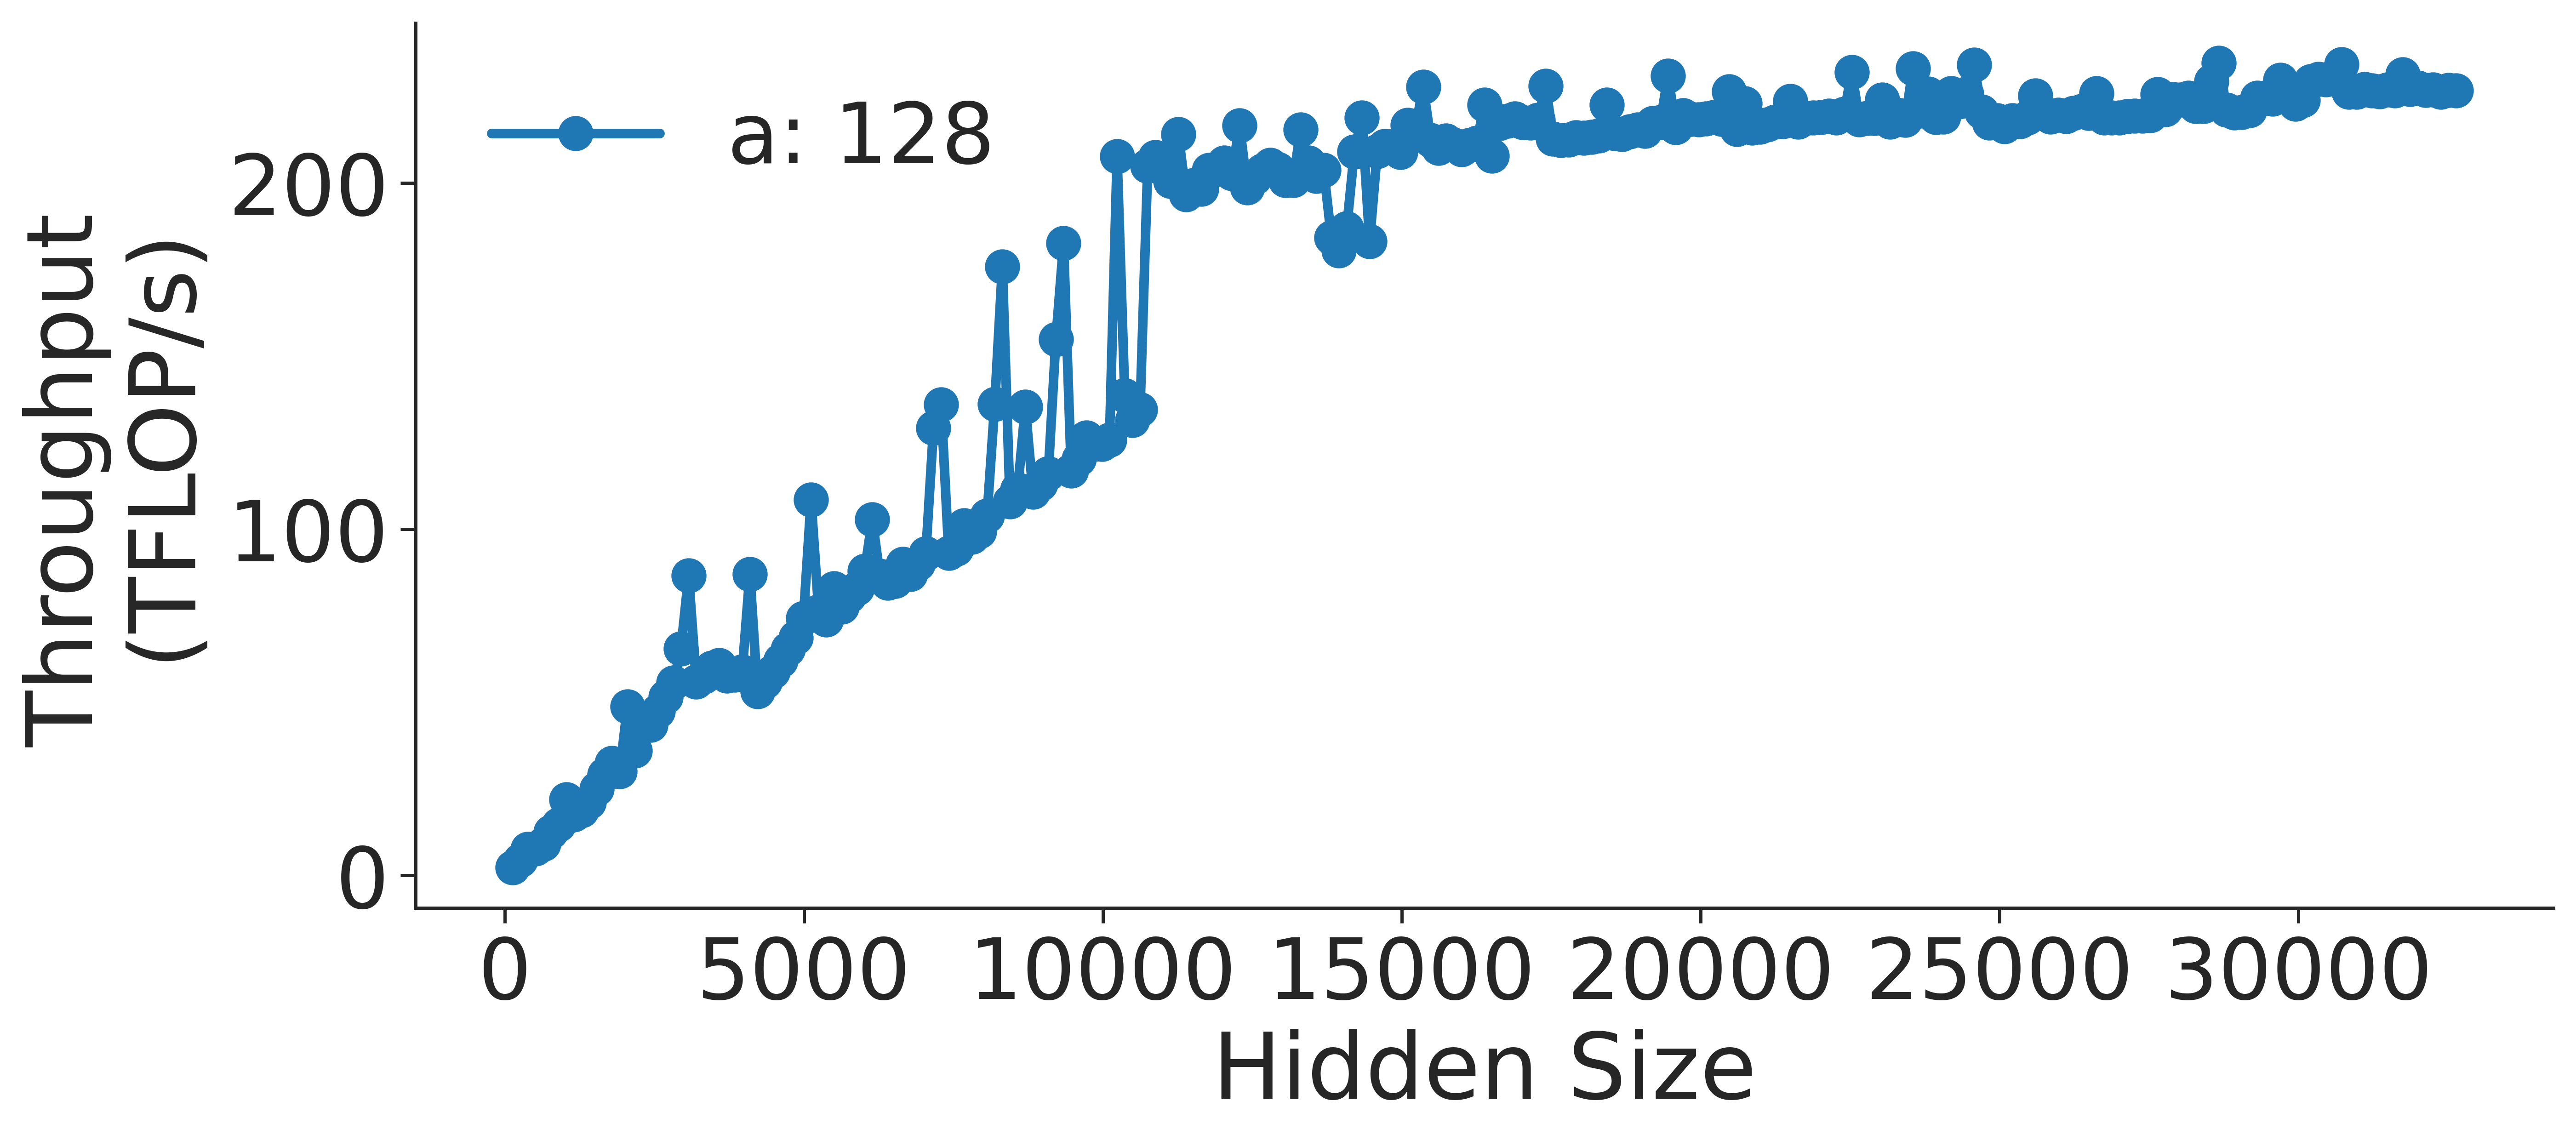

In [104]:
plot_actual_attention_throughput(read_logfile("../results/transformer_data/flash_attn_hsweep.out"))

## Plots all Transformer components, 

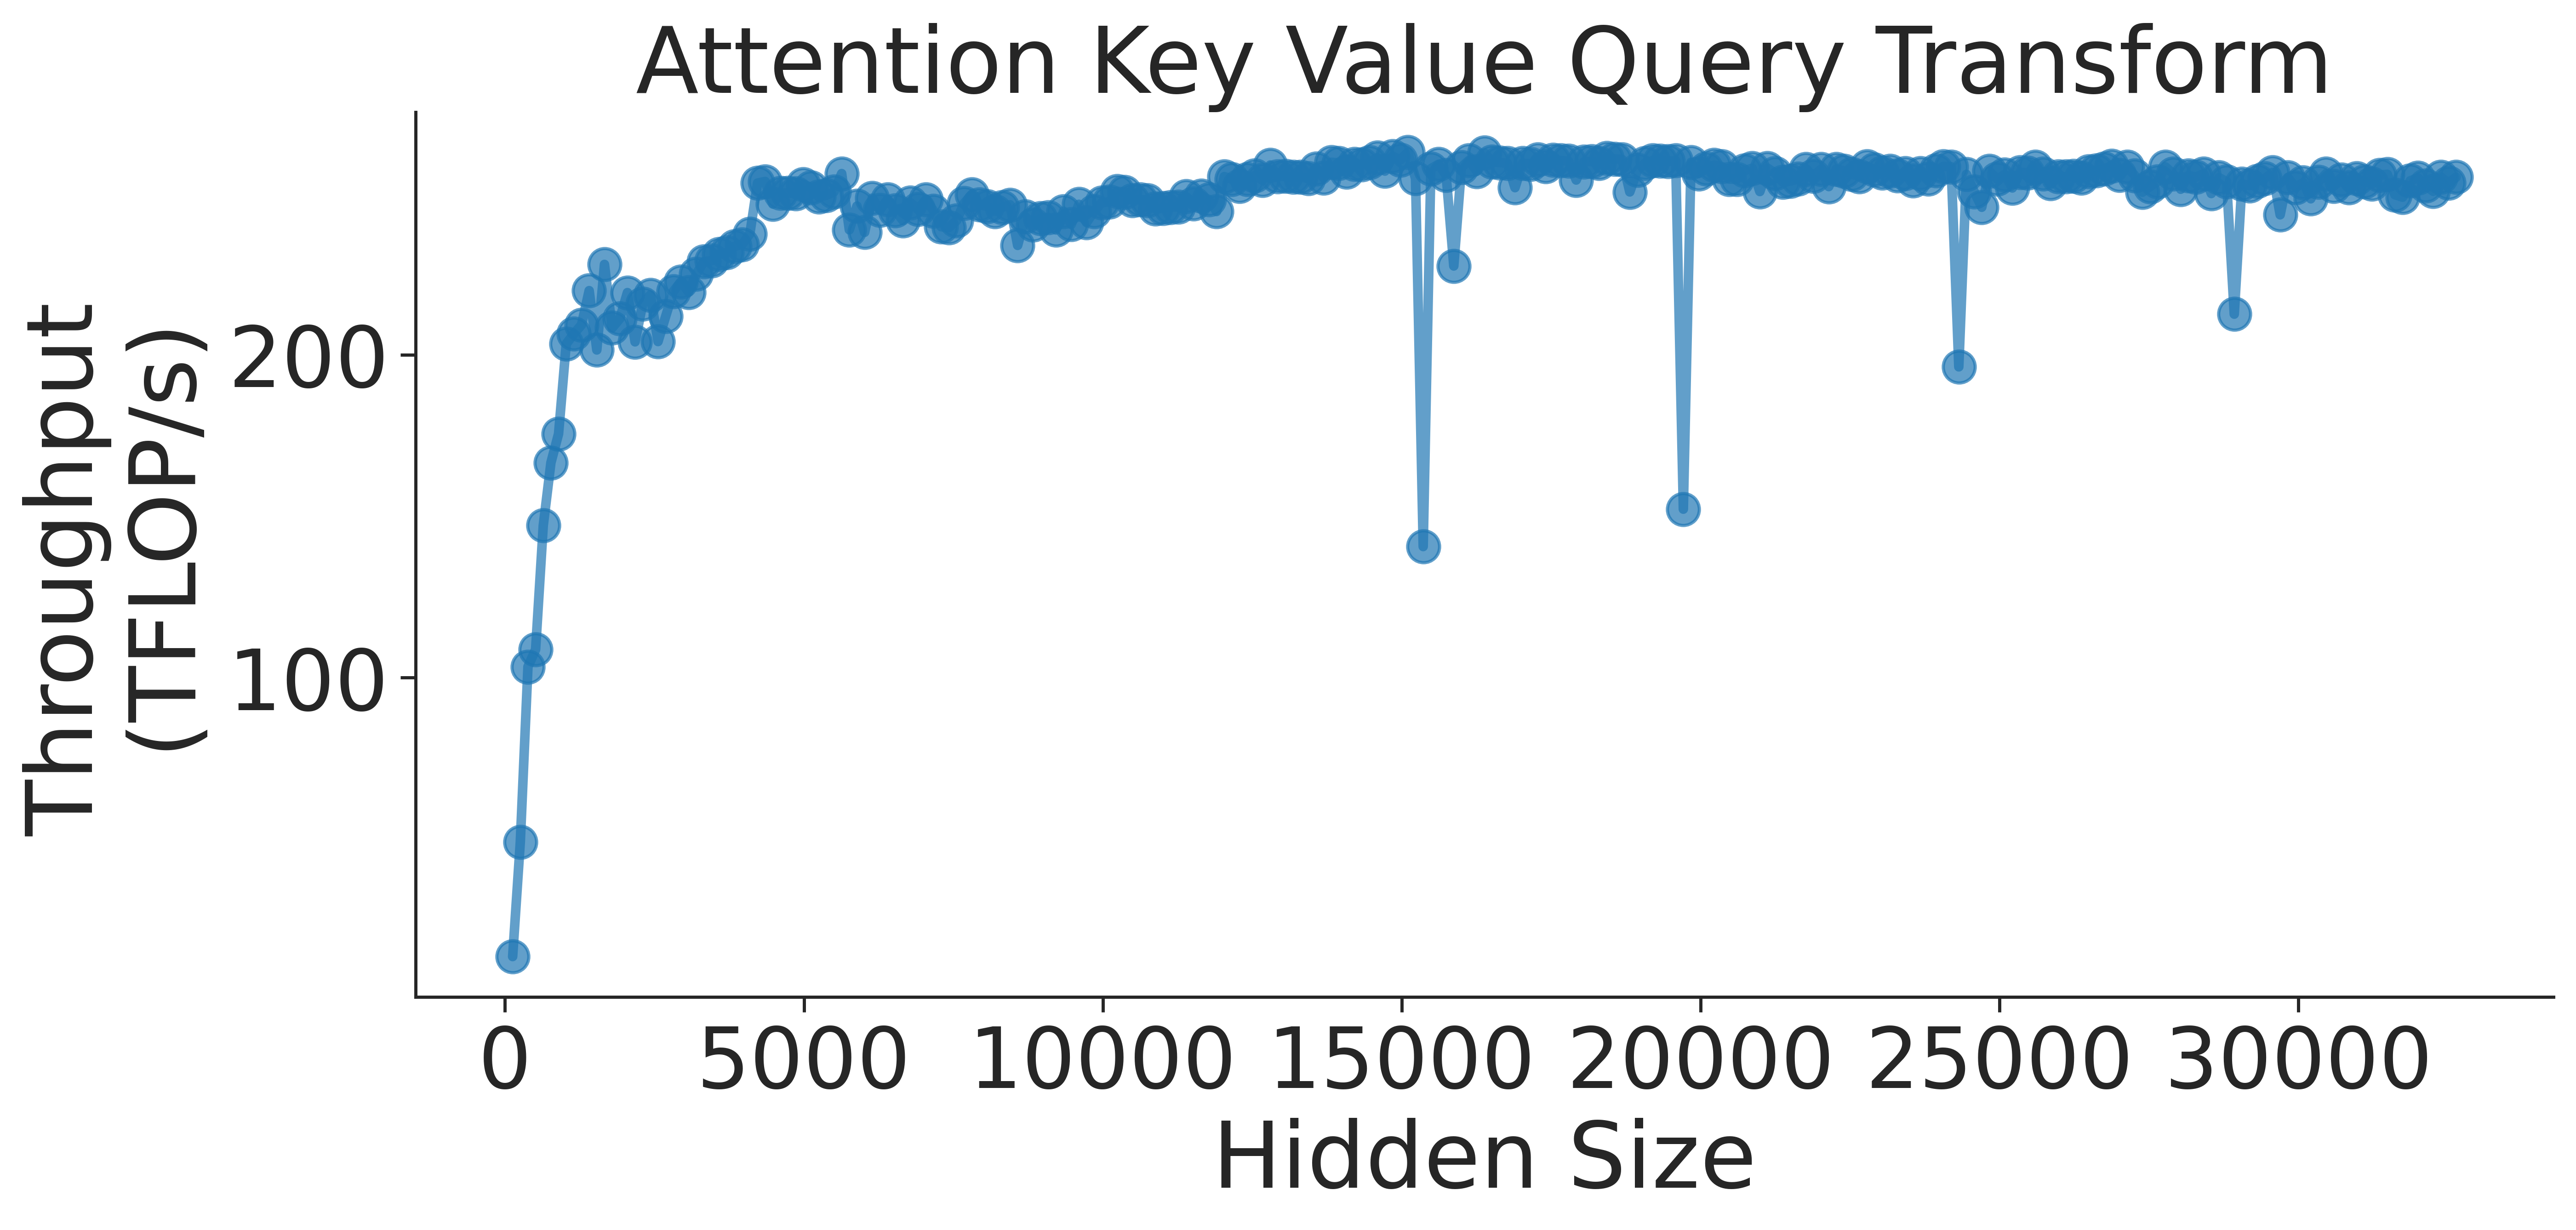

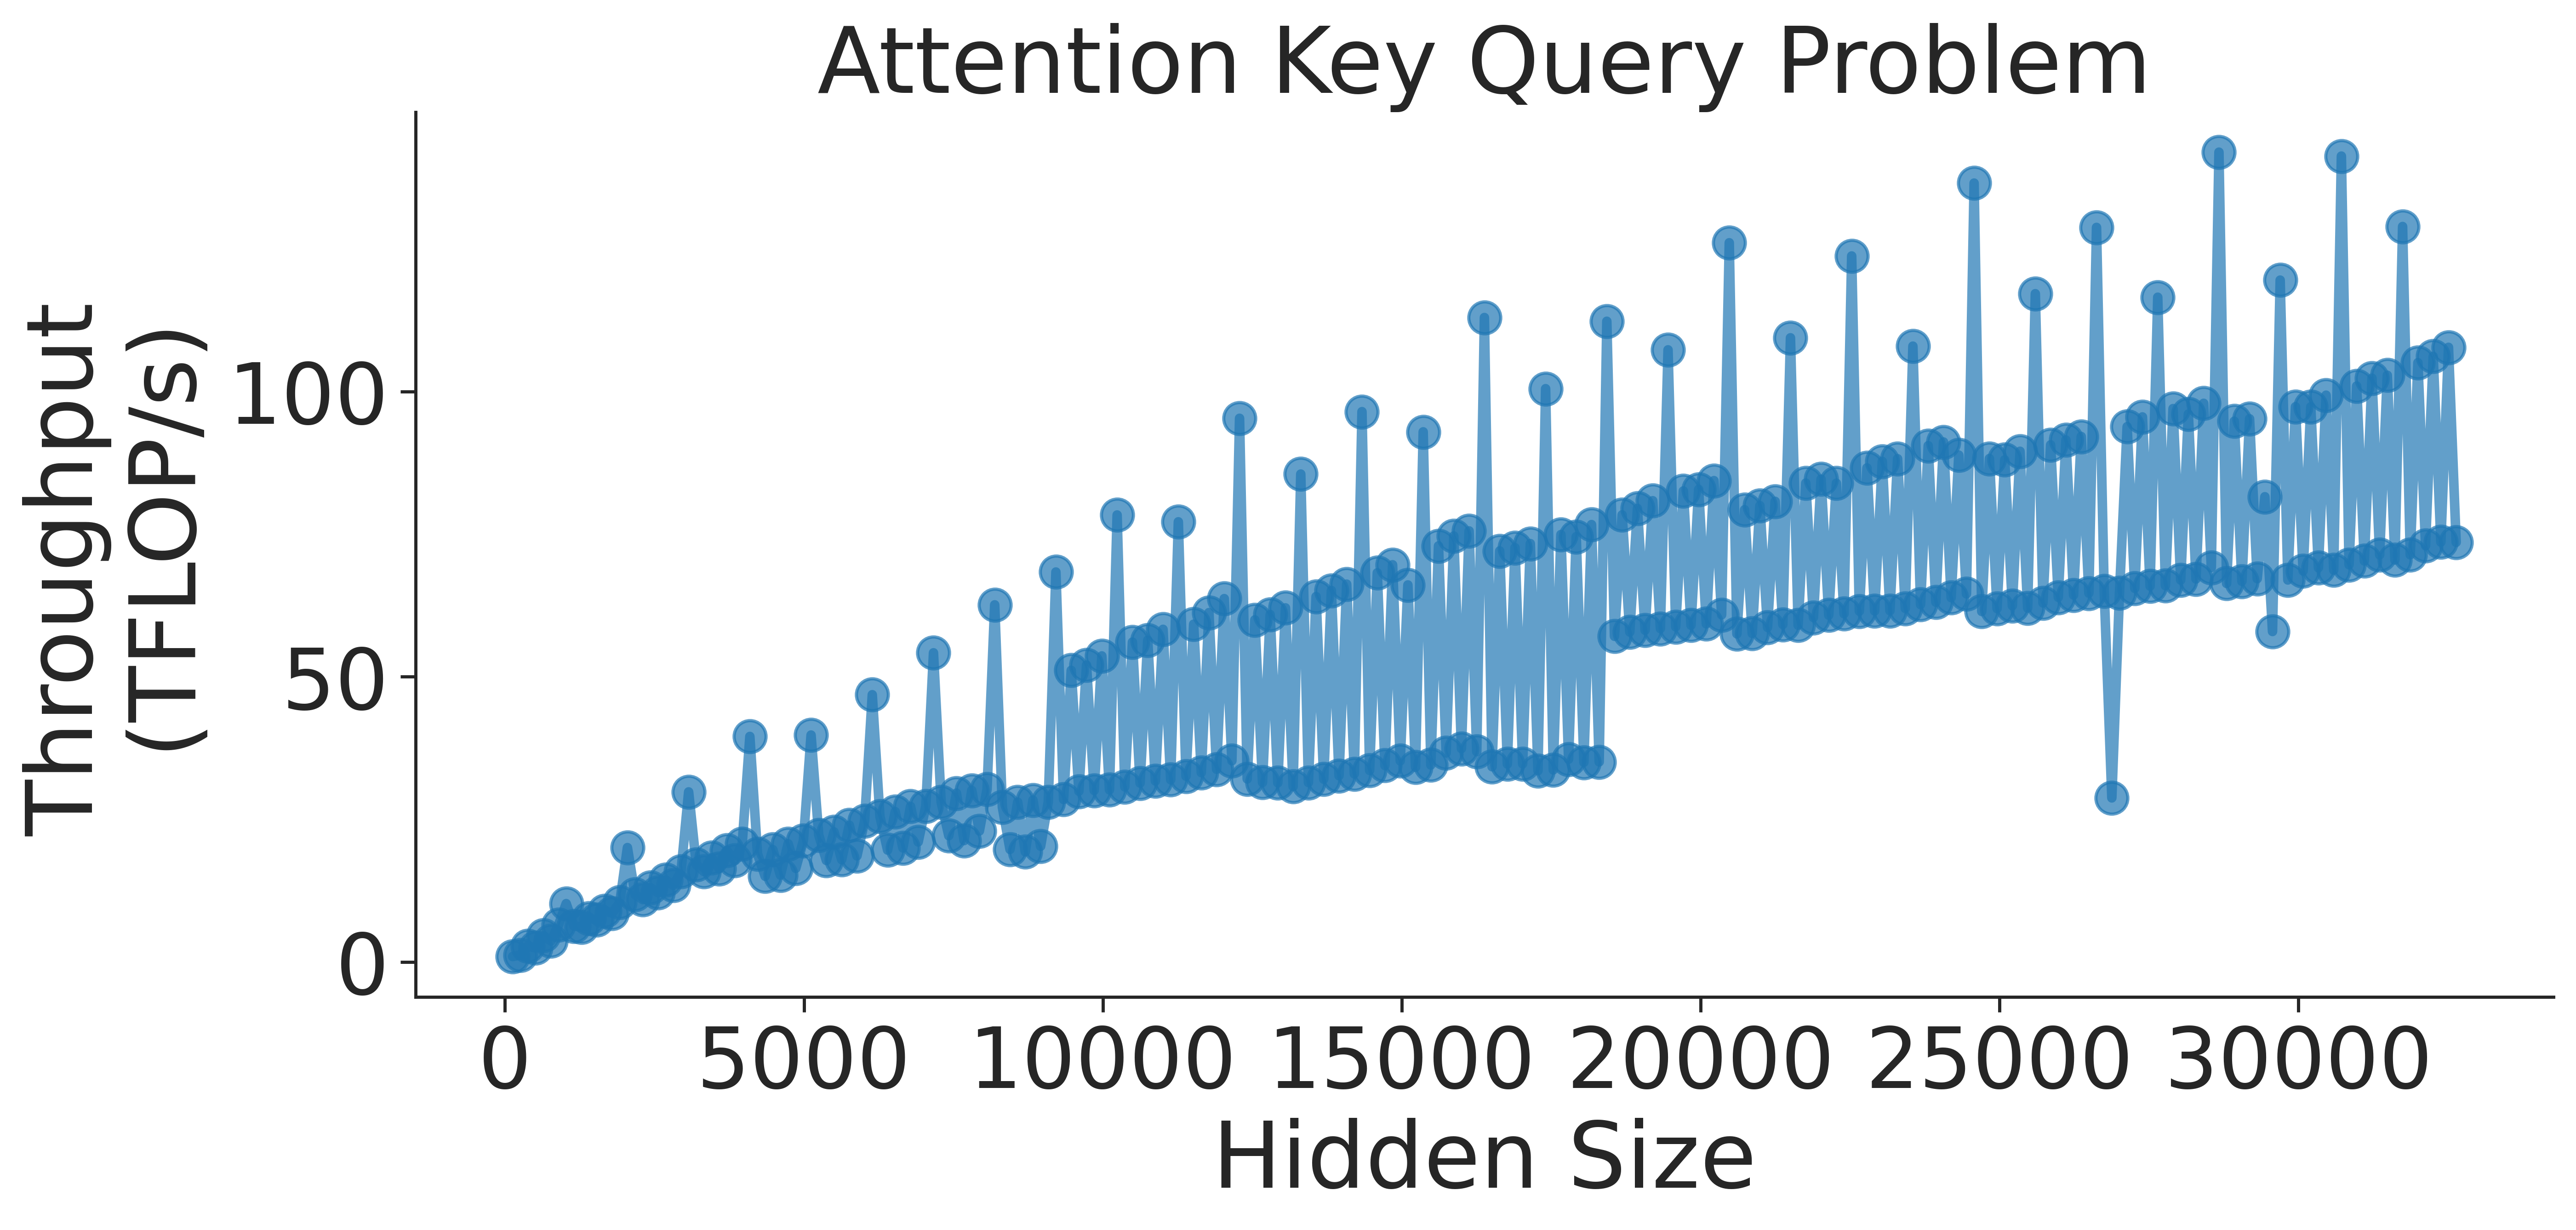

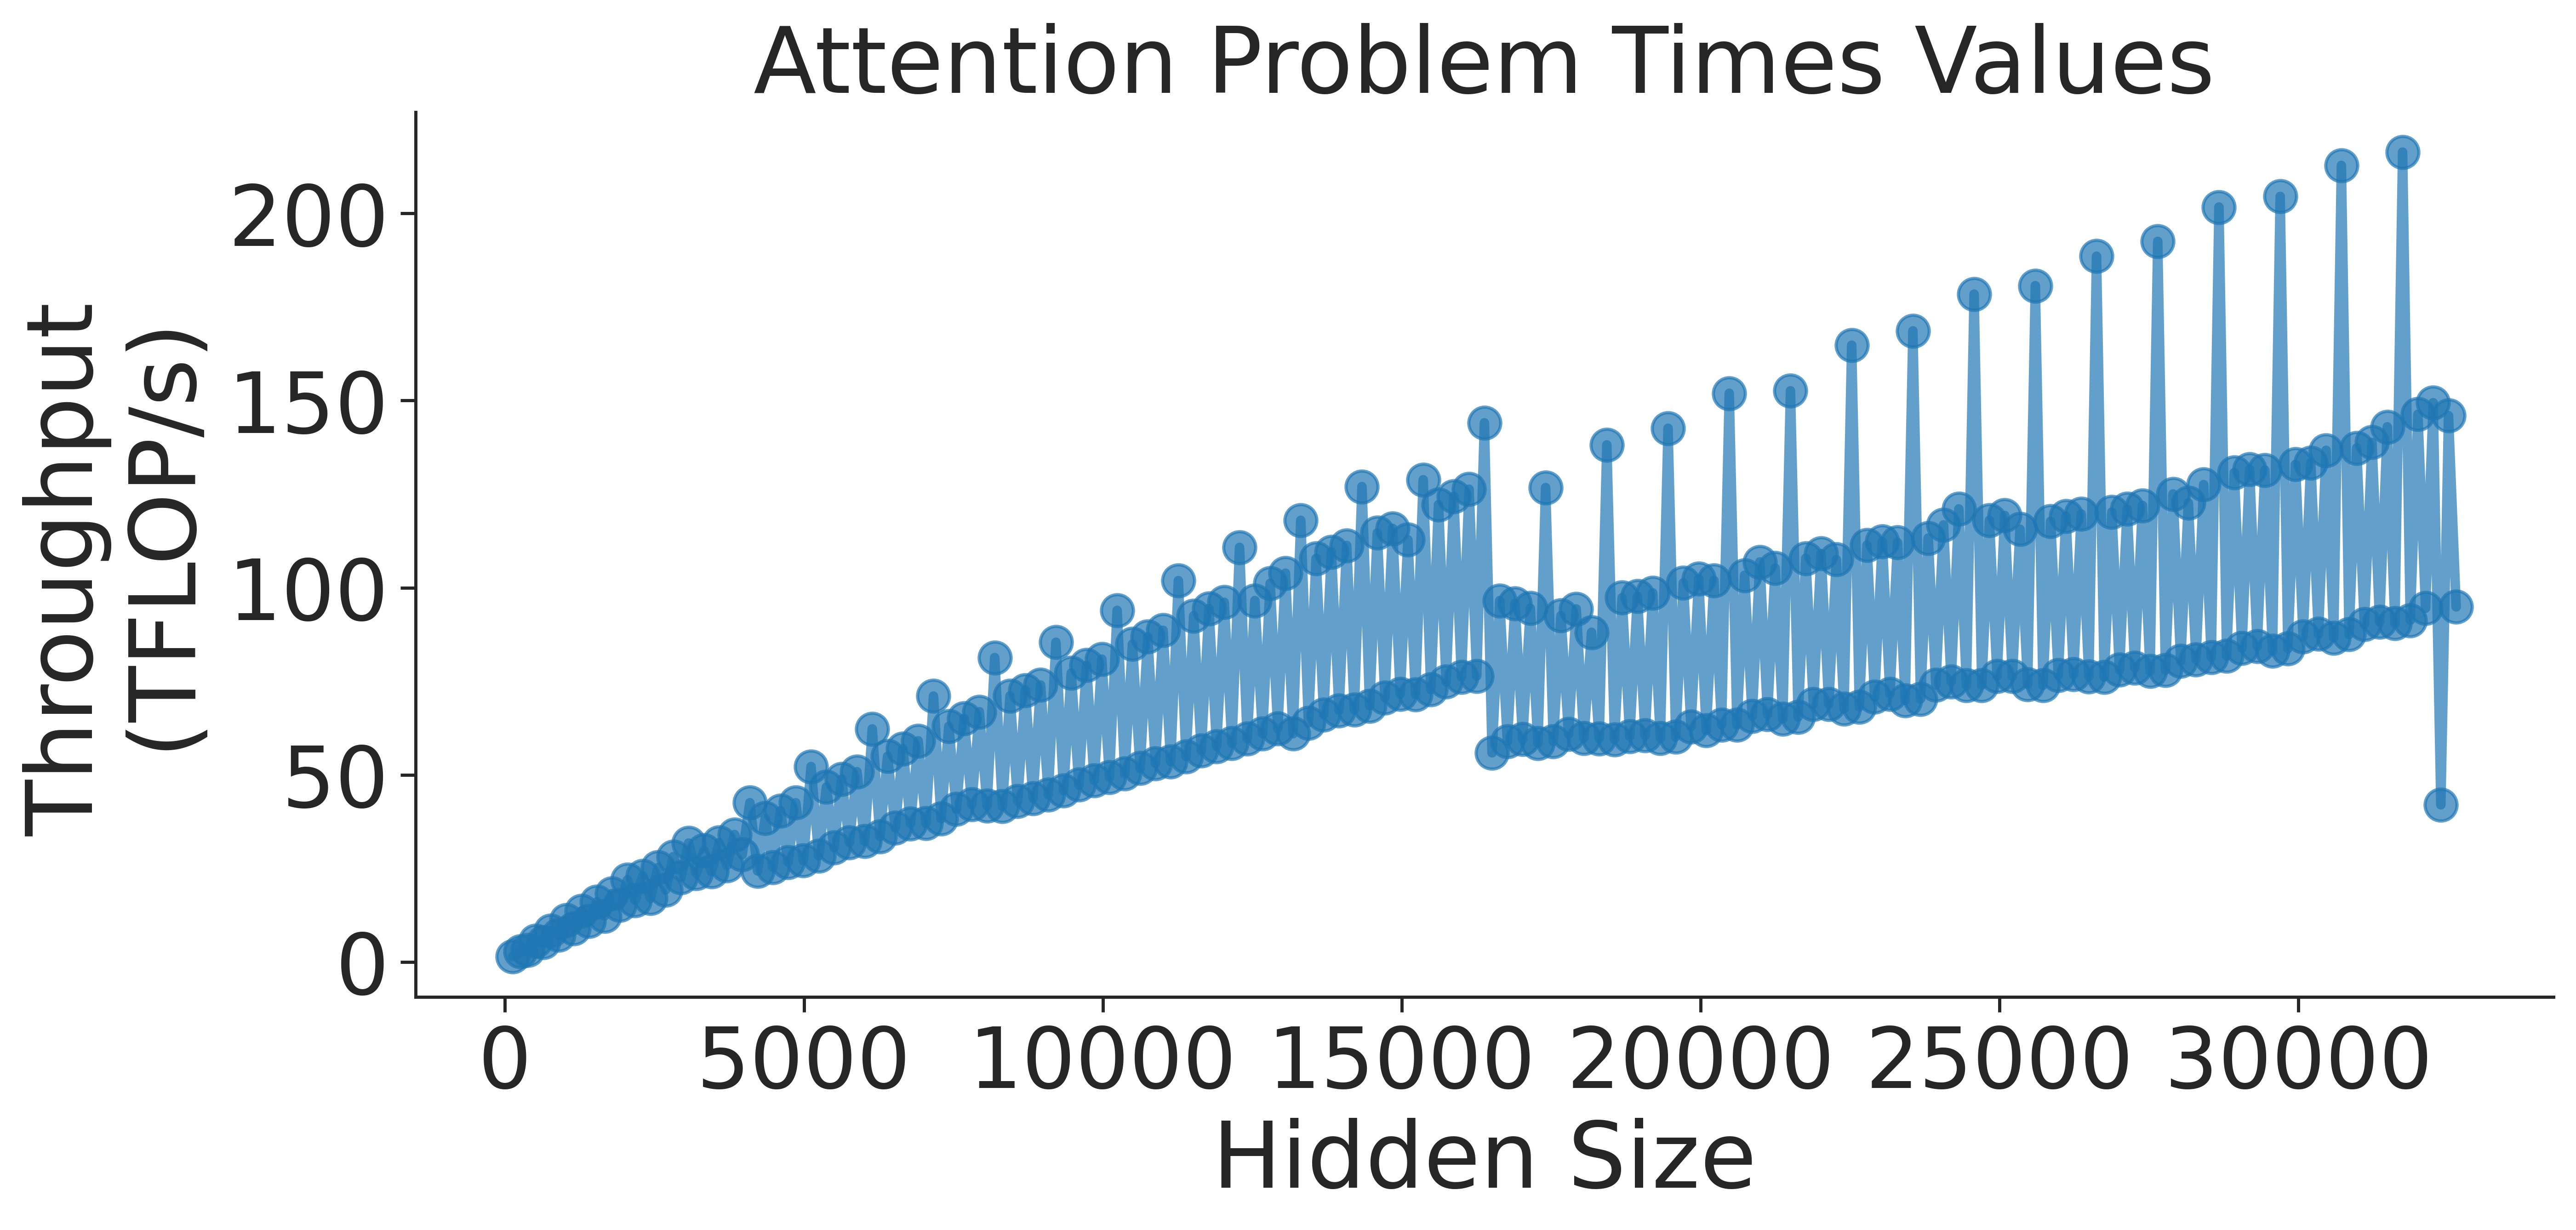

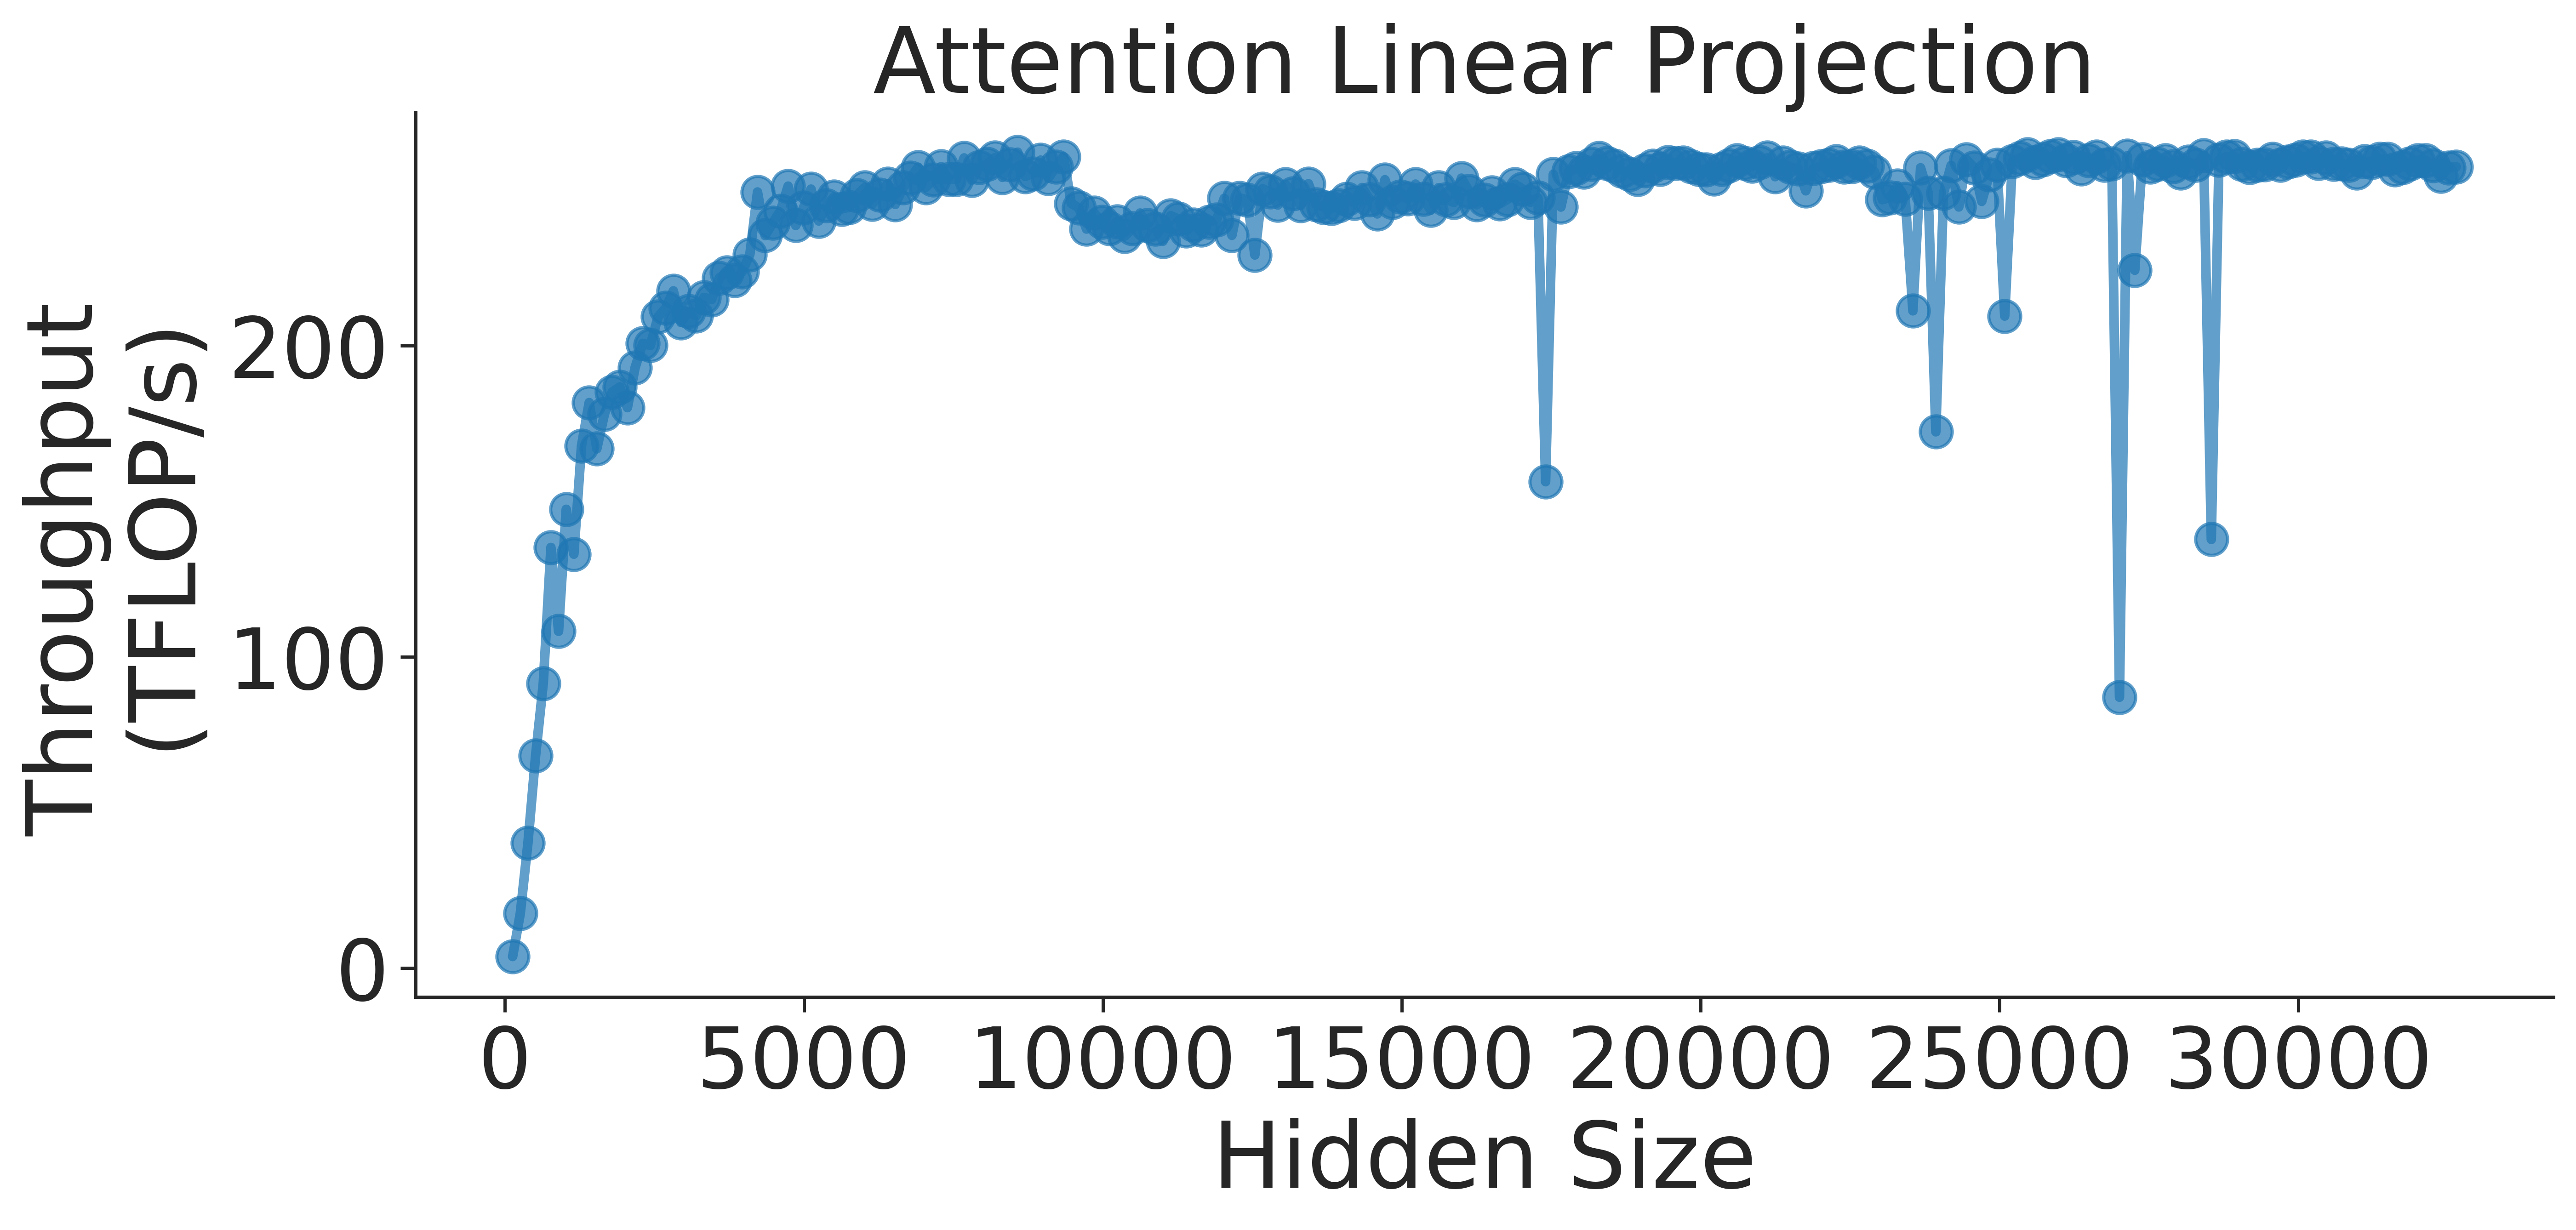

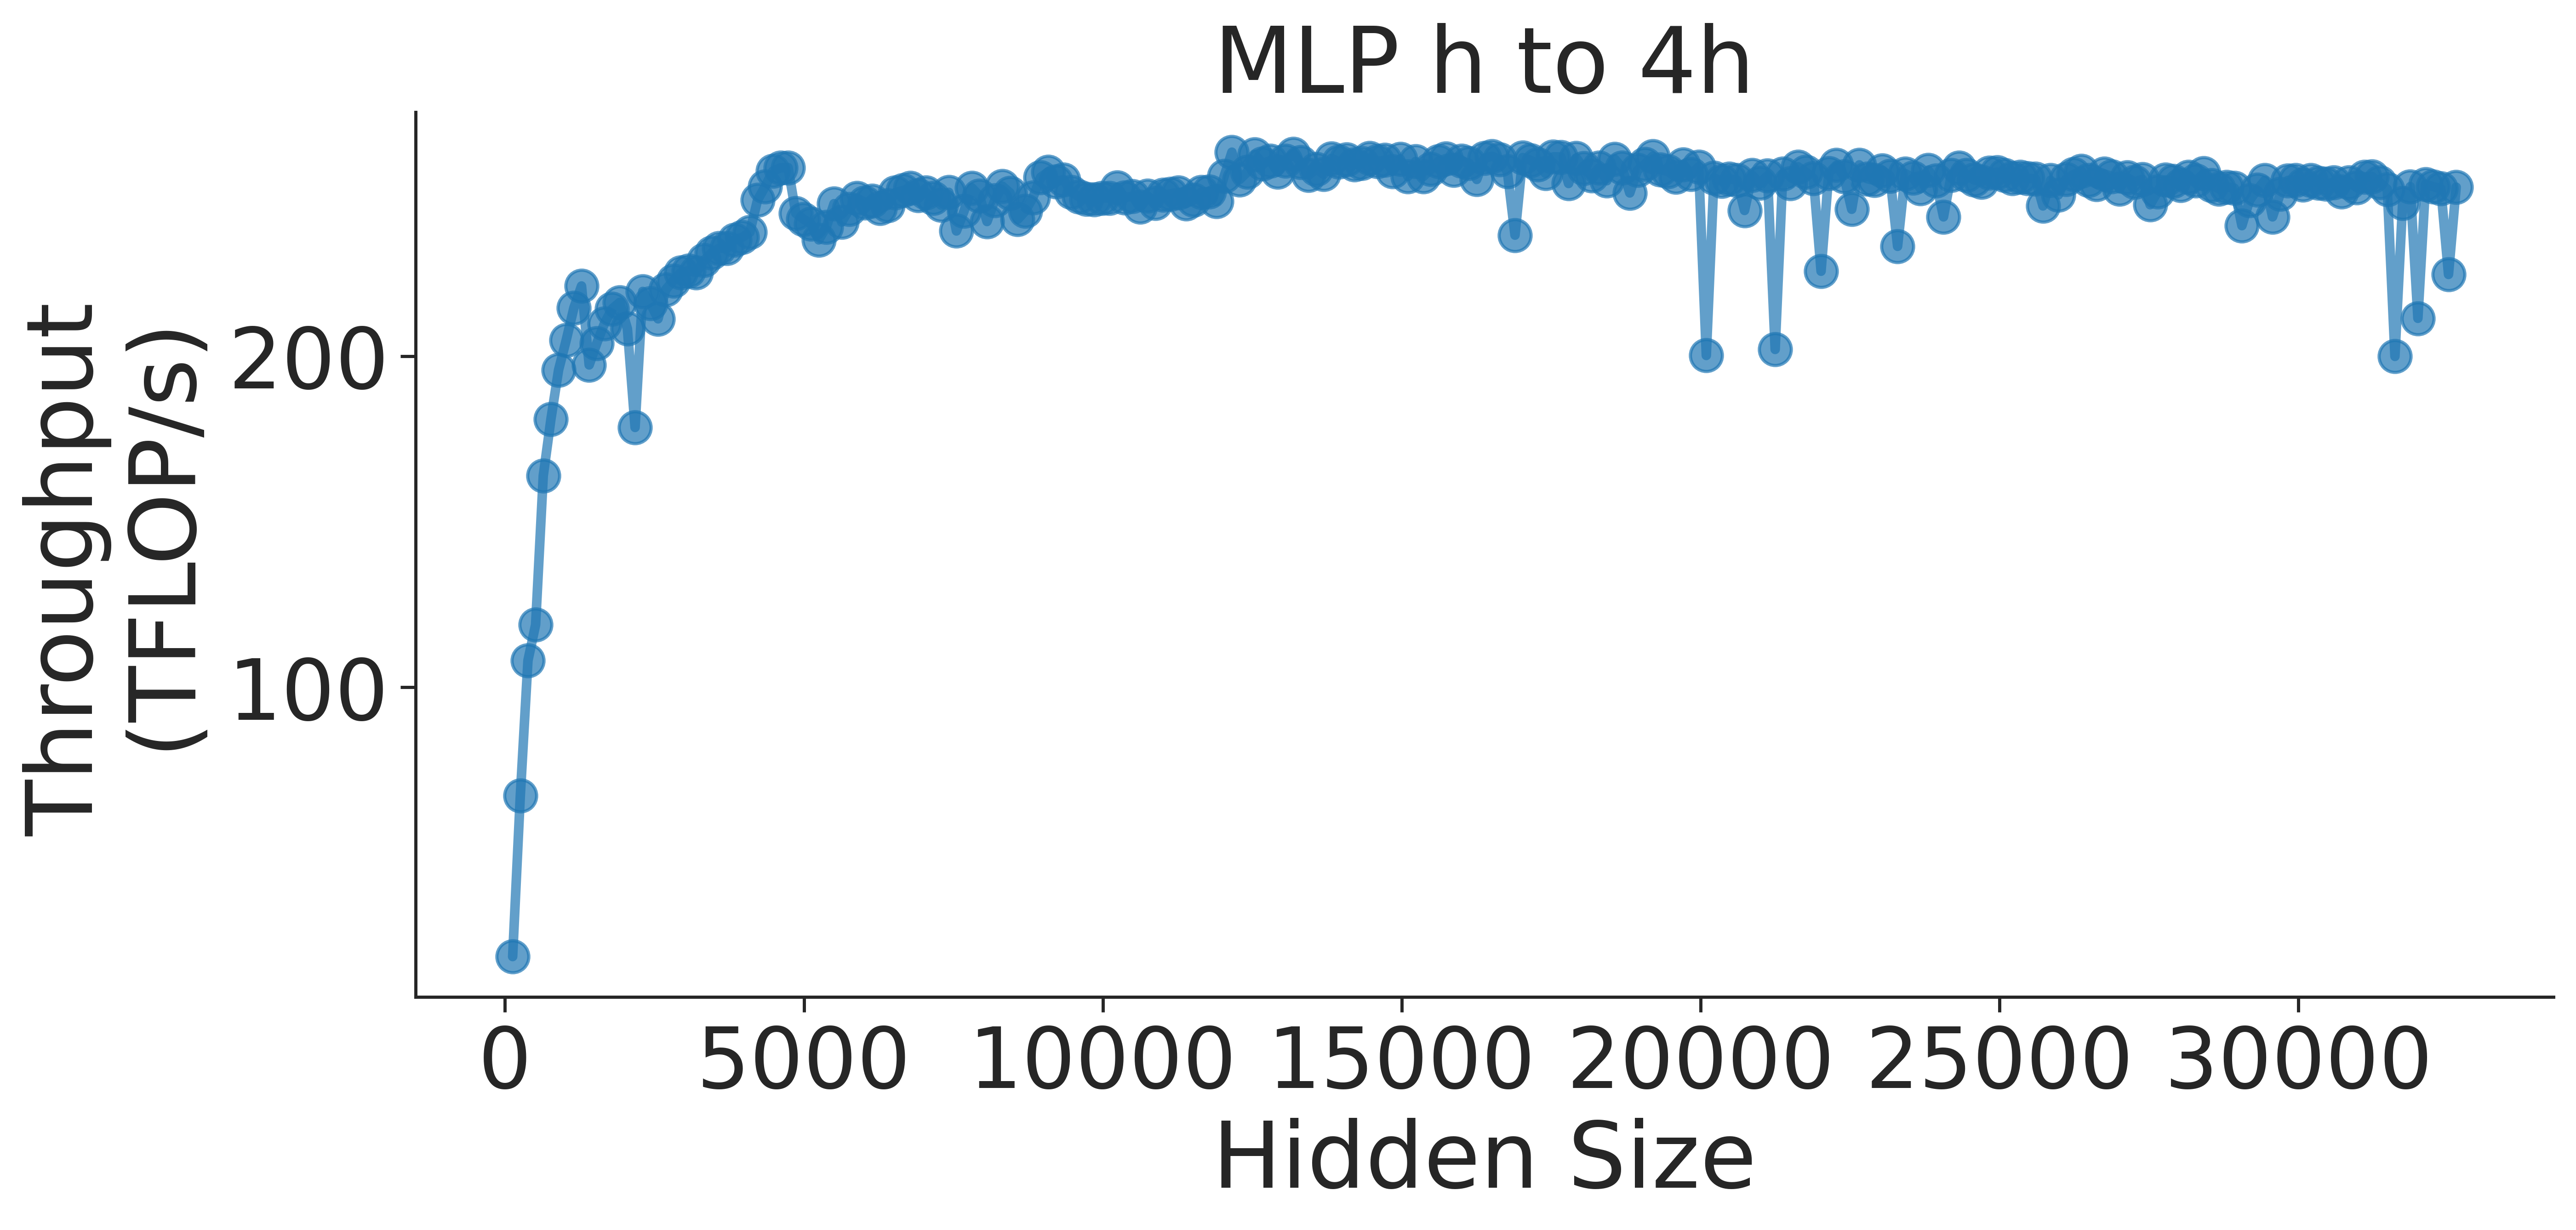

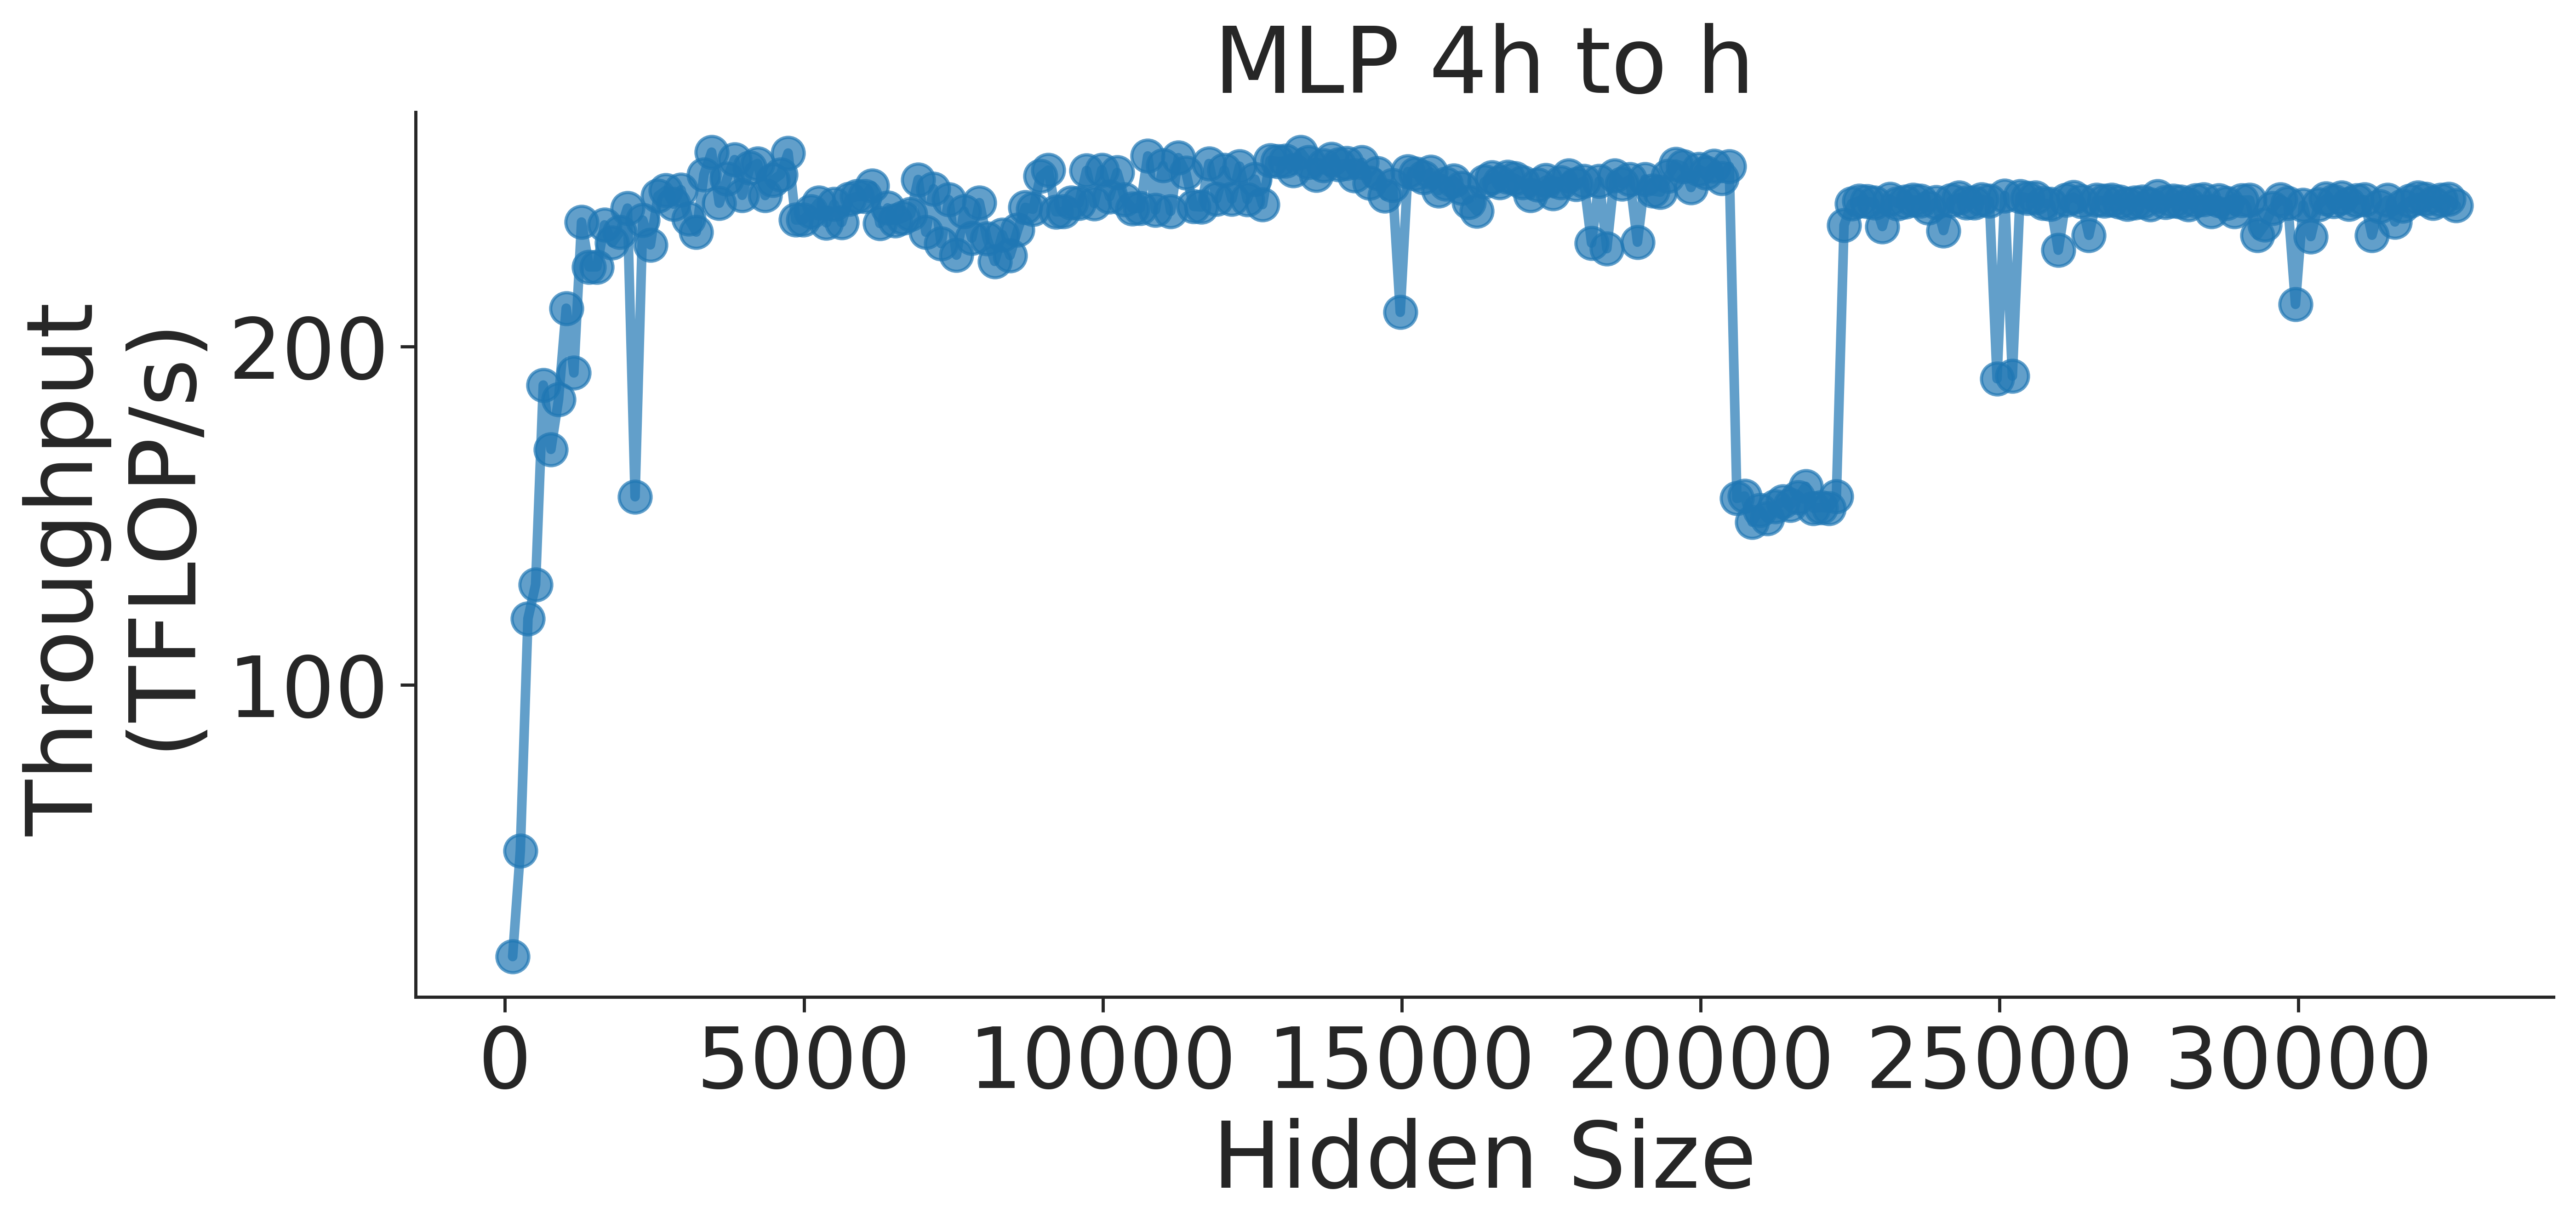

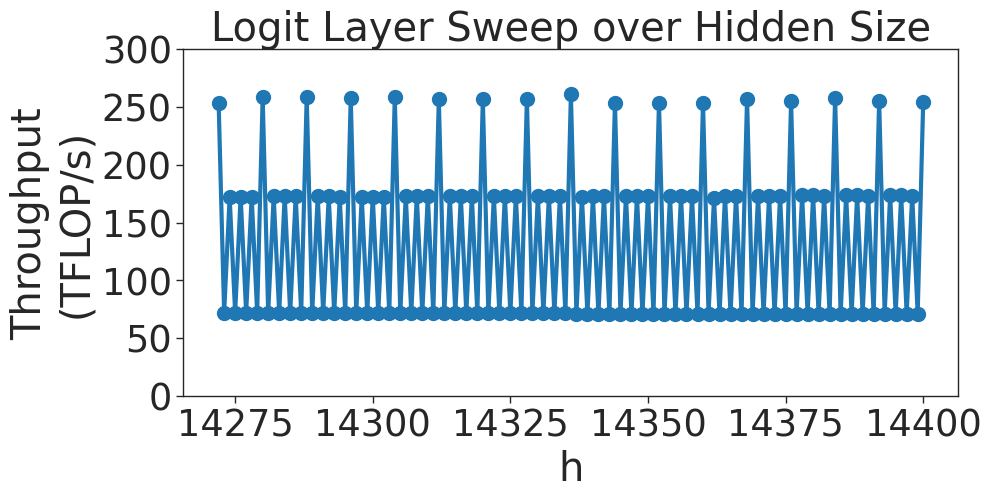

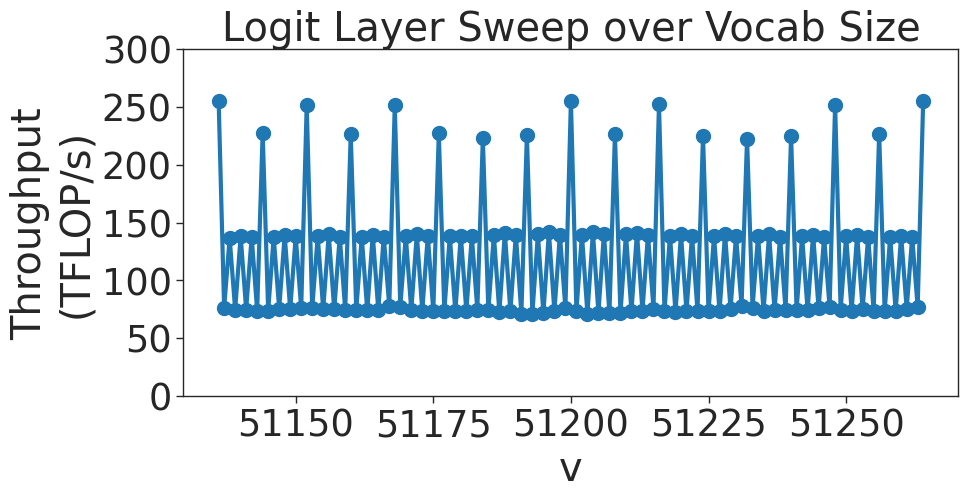

In [105]:
plot_vals = [
    "attention_key_value_query_transform",
    "attention_key_query_prob",
    "attention_prob_times_values",
    "attention_linear_projection",
    'mlp_h_to_4h',
    "mlp_4h_to_h"
]


plot_titles = [
    "Attention Key Value Query Transform",
    "Attention Key Query Problem",
    "Attention Problem Times Values",
    "Attention Linear Projection",
    "MLP h to 4h",
    "MLP 4h to h"
]


for i in range(len(plot_vals)):
    plot_transformer_components_throughput(read_logfile("../results/transformer_data/h_sweep.out"), "hidden_size","Hidden Size", plot_vals[i], plot_titles[i], "Throughput \n (TFLOP/s)")     

plot_vocab(read_logfile_mm_bmm(f"../results/transformer_data/vocab_h_sweep.out"),
                 label_variable='n',
                 label_variable_values=[51200],
                 xaxis_variable='k',
                 xlabel='h',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[0,50,100,150,200,250,300],
                 title="Logit Layer Sweep over Hidden Size")

plot_vocab(read_logfile_mm_bmm(f"../results/transformer_data/vocab_v_sweep.out"),
                 label_variable='k',
                 label_variable_values=[14336],
                 xaxis_variable='n',
                 xlabel='v',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[0,50,100,150,200,250,300],
                 title="Logit Layer Sweep over Vocab Size")

## Plot Full Transformer Layer

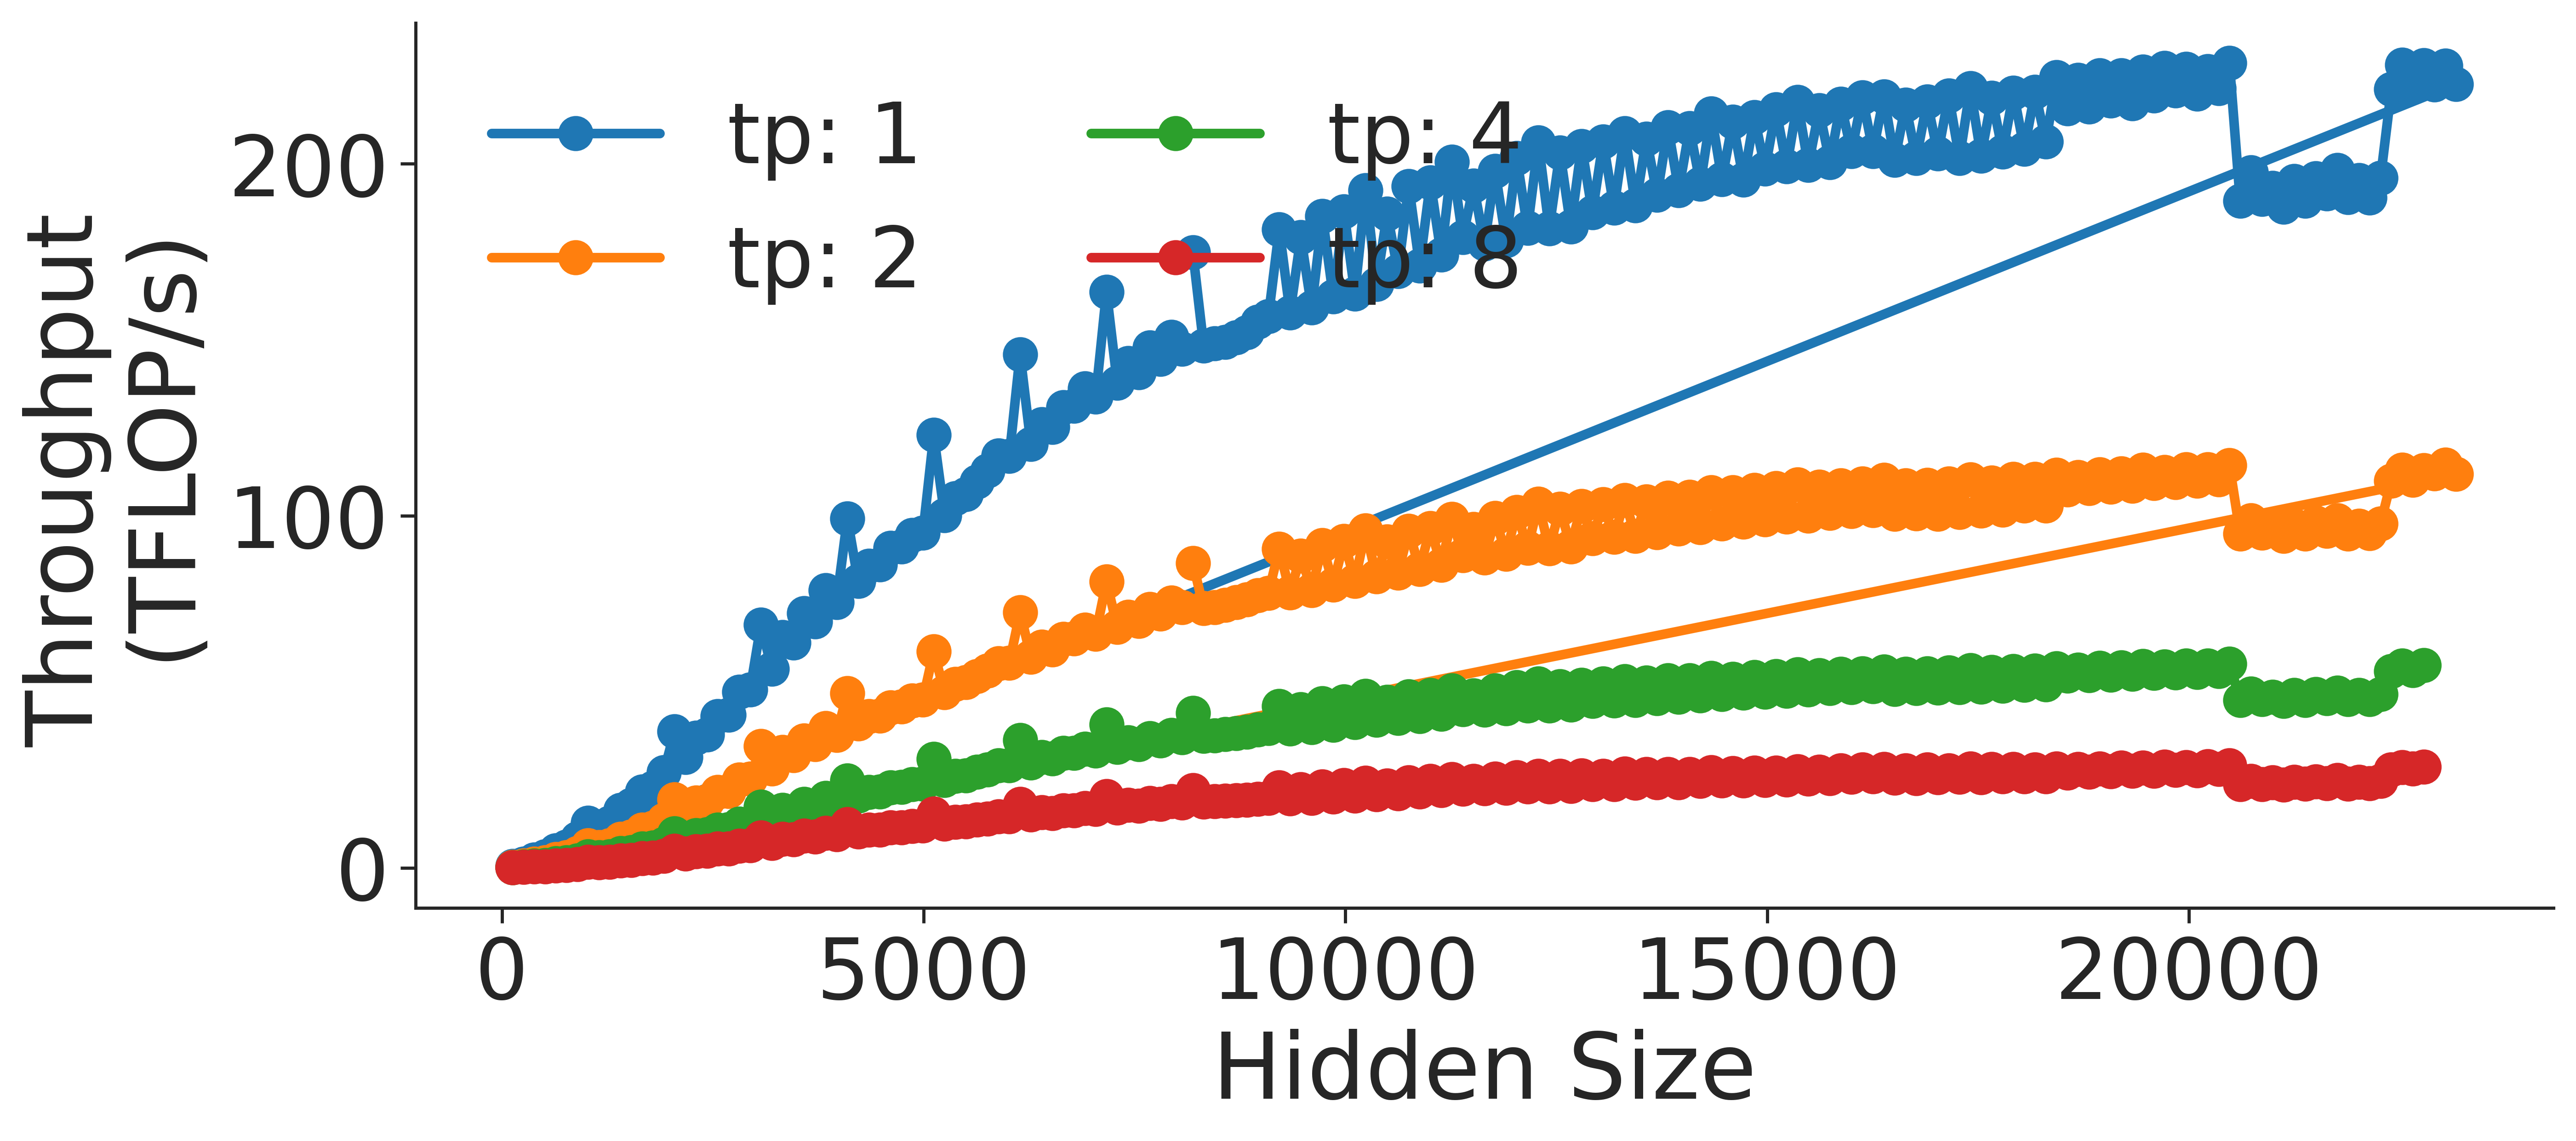

In [106]:
plot_actual_layer_throughput(read_logfile("../results/transformer_data/tensor_parallel_h_sweep.out"),title=None)